In [12]:
pip install matplotlib

     ---------------------------------------- 0.0/168.3 kB ? eta -:--:--
     -- ------------------------------------- 10.2/168.3 kB ? eta -:--:--
     ------ ------------------------------ 30.7/168.3 kB 435.7 kB/s eta 0:00:01
     --------------------------- ---------- 122.9/168.3 kB 1.0 MB/s eta 0:00:01
     -------------------------------------- 168.3/168.3 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.2/7.8 MB 4.8 MB/s eta 0:00:02
   -- ------------------------------------- 0.4/7.8 MB 4.2 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/7.8 MB 5.0 MB/s eta 0:00:02
   ------ --------------------------------- 1.2/7.8 MB 6.6 MB/s eta 0:00:01
   --------- ------------------------------ 1.8/7.8 MB 7.6 MB/s eta 0:00:01
   ---------- ----------------------------- 2.0/7.8 MB 7.9 MB/s eta 0:00:01
   ---------- ----------------------------- 2.0/7.8 MB 7.9 MB/s eta 0:00:01
   ---------


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


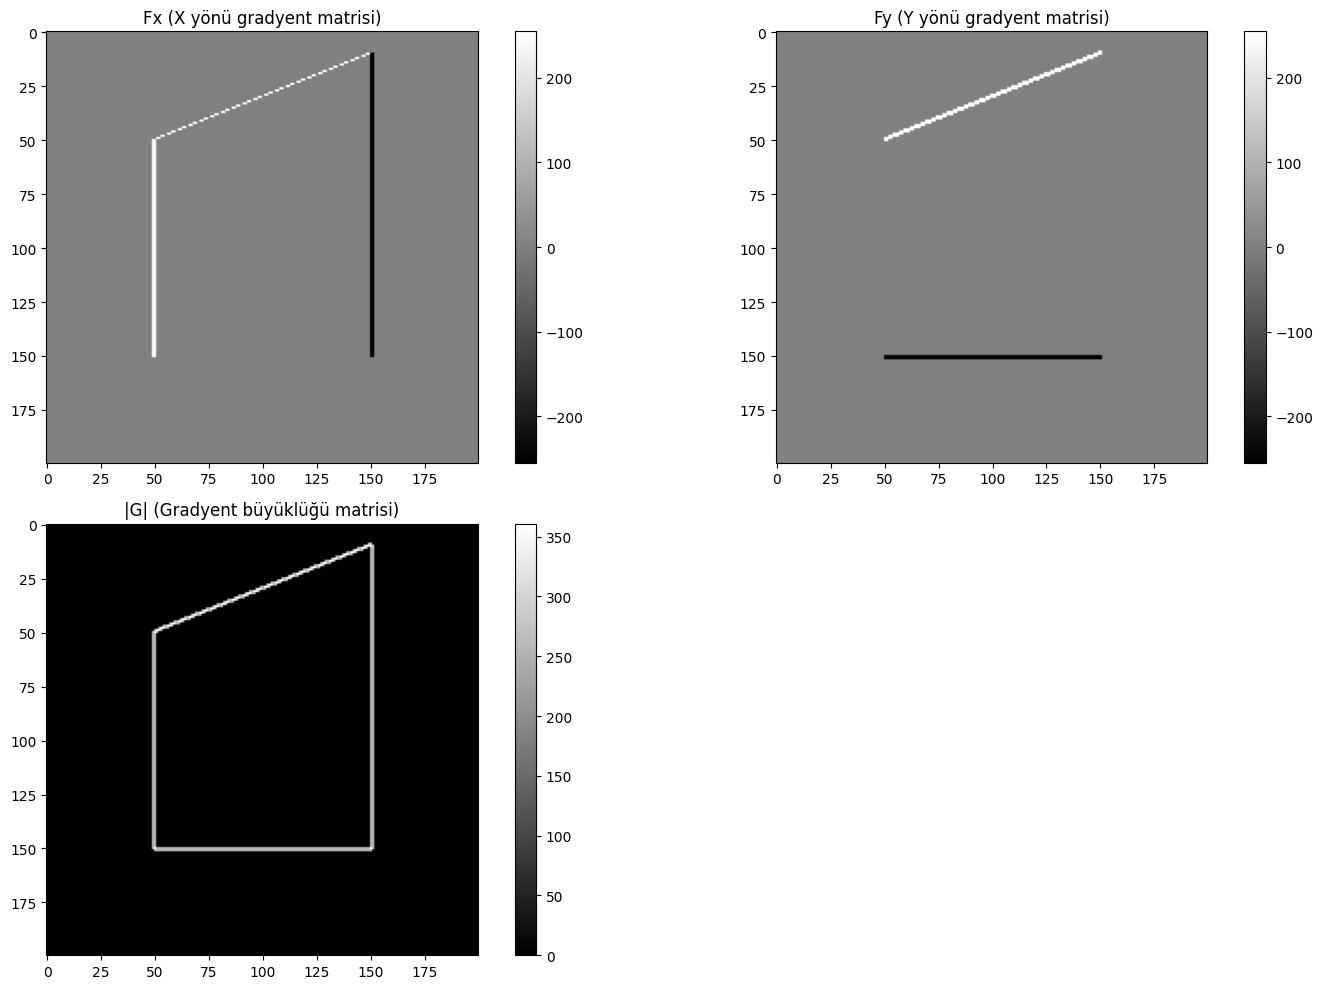

Nokta: (150, 75)
  F_x: 0.0, F_y: -255.0
  Gradyent Büyüklüğü: 255.00
  Açı (Derece): -90.00
  Kategorize Edilen Açı: -90

Nokta: (125, 50)
  F_x: 255.0, F_y: 0.0
  Gradyent Büyüklüğü: 255.00
  Açı (Derece): 0.00
  Kategorize Edilen Açı: 0

Nokta: (30, 150)
  F_x: -255.0, F_y: 0.0
  Gradyent Büyüklüğü: 255.00
  Açı (Derece): 180.00
  Kategorize Edilen Açı: 180

Nokta: (190, 170)
  F_x: 0.0, F_y: 0.0
  Gradyent Büyüklüğü: 0.00
  Açı (Derece): 0.00
  Kategorize Edilen Açı: Undefined



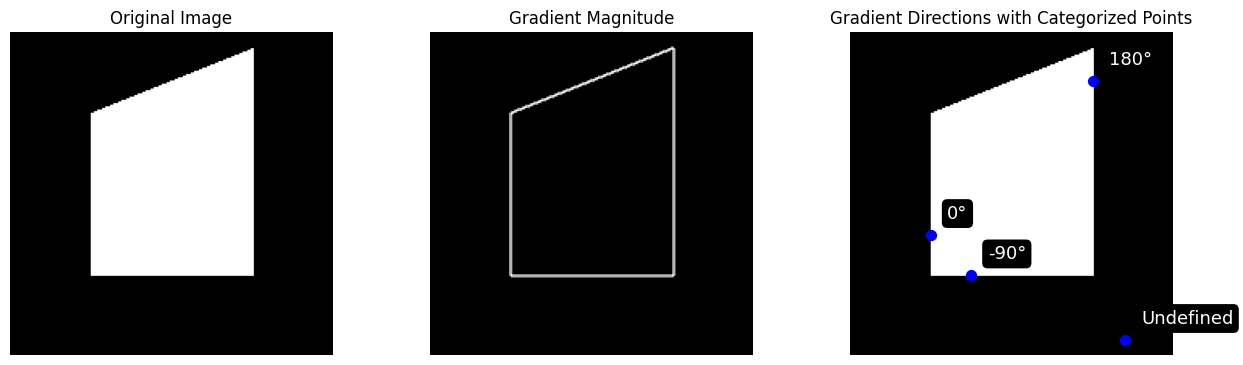

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

height, width = 200, 200
image = np.zeros((height, width), dtype=np.uint8)  
polygon = np.array([[50, 150], [150, 150], [150, 10], [50, 50]])  
cv2.fillPoly(image, [polygon], 255)  

Mx = np.array([[-1, 0, 1]])  
My = np.array([[-1], 
               [0], 
               [1]]) 

Fx = np.zeros_like(image, dtype=float)
Fy = np.zeros_like(image, dtype=float)

for i in range(1, height - 1): 
    for j in range(1, width - 1):
        Fx[i, j] = (Mx[0, 0] * image[i, j-1] +
                    Mx[0, 1] * image[i, j] +
                    Mx[0, 2] * image[i, j+1])
        
        
        Fy[i, j] = (My[0, 0] * image[i-1, j] +
                    My[1, 0] * image[i, j] +
                    My[2, 0] * image[i+1, j])

G_magnitude = np.sqrt(Fx**2 + Fy**2)
G_angle = np.arctan2(Fy, Fx) * (180 / np.pi)

def categorize_angle(angle, fx, fy):
    if fx == 0 and fy < 0:
        return -90  
    elif fy == 0 and fx > 0:
        return 0  
    elif fy == 0 and fx < 0:
        return 180  
    elif fx == 0 and fy == 0:
        return "Undefined"  
    else:
        return angle  

selected_points= [
    (150, 75), 
    (125, 50), 
    (30, 150),  
    (190, 170)  
]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title("Fx (X yönü gradyent matrisi)")
plt.imshow(Fx, cmap='gray')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.title("Fy (Y yönü gradyent matrisi)")
plt.imshow(Fy, cmap='gray')
plt.colorbar()

plt.subplot(2, 2, 3)
plt.title("|G| (Gradyent büyüklüğü matrisi)")
plt.imshow(G_magnitude, cmap='gray')
plt.colorbar()

plt.tight_layout()
plt.show()


categorized_angles = []

for y, x in selected_points:
    fx, fy = Fx[y, x], Fy[y, x]
    angle = np.arctan2(fy, fx) * (180 / np.pi)
    categorized_angle = categorize_angle(angle, fx, fy)
    categorized_angles.append(categorized_angle)
    print(f"Nokta: ({y}, {x})")
    print(f"  F_x: {fx}, F_y: {fy}")
    print(f"  Gradyent Büyüklüğü: {np.sqrt(fx**2 + fy**2):.2f}")
    print(f"  Açı (Derece): {angle:.2f}")
    print(f"  Kategorize Edilen Açı: {categorized_angle}\n")

plt.figure(figsize=(15, 5)) 

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Gradient Magnitude")
plt.imshow(G_magnitude, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Gradient Directions with Categorized Points")
plt.imshow(image, cmap='gray')
plt.axis("off")
for i, (y, x) in enumerate(selected_points):
    plt.scatter(x, y, color="blue", s=50)
    angle_display = f"{categorized_angles[i]}\u00b0" if isinstance(categorized_angles[i], (int, float)) else categorized_angles[i]
    plt.text(
        x + 10, y - 10, angle_display,
        color="white", fontsize=13,
        bbox=dict(facecolor="black", edgecolor="none", boxstyle="round,pad=0.3") 
    )

plt.subplots_adjust(wspace=0.3)
plt.show()
